In [15]:
!apt-get -qq install -y graphviz && pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state =0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [3]:
#Checks for Overfitting(Performance on traning data higher than on test data)
print("Accuracy on training set: {:3f.}", tree.score(X_train,y_train))
print("Accuracy on tests data:",tree.score(X_test,y_test))

Accuracy on training set: {:3f.} 1.0
Accuracy on tests data: 0.9370629370629371


In [4]:
tree2 = DecisionTreeClassifier(max_depth=4,random_state =0)
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [5]:
print("Accuracy on training set: {:3f.}", tree2.score(X_train,y_train))
print("Accuracy on tests data:",tree2.score(X_test,y_test))

Accuracy on training set: {:3f.} 0.9882629107981221
Accuracy on tests data: 0.951048951048951


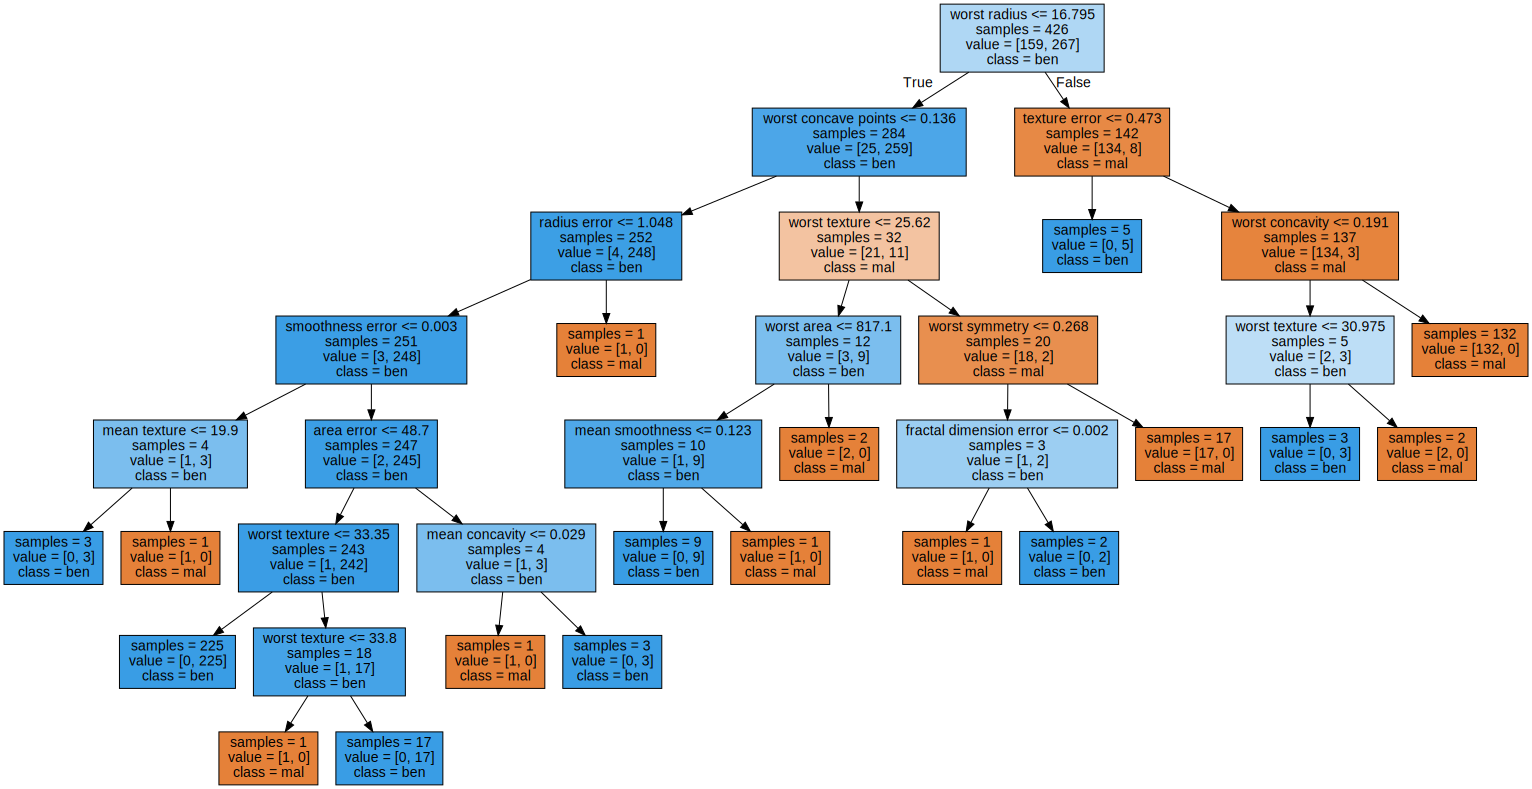

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["mal","ben"],
               feature_names=cancer.feature_names, impurity=False,filled=True)

import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
  display(graphviz.Source(dot_graph))